In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/sample_data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [10]:
df.gender=df.gender.astype('category')
df.race_ethnicity=df.race_ethnicity.astype('category')
df.parental_level_of_education=df.parental_level_of_education.astype('category')
df.lunch=df.lunch.astype('category')
df.test_preparation_course=df.test_preparation_course.astype('category')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   category
 1   race_ethnicity               1000 non-null   category
 2   parental_level_of_education  1000 non-null   category
 3   lunch                        1000 non-null   category
 4   test_preparation_course      1000 non-null   category
 5   math_score                   1000 non-null   int64   
 6   reading_score                1000 non-null   int64   
 7   writing_score                1000 non-null   int64   
dtypes: category(5), int64(3)
memory usage: 29.2 KB


In [12]:
print("GENDER :")
print("gender ",df.gender.unique())
print("ETHENCITY :")
print("etheenicity",df.race_ethnicity.unique())
print("PAREN LEVEL EDUCATION :")
print("parental level of education",df.parental_level_of_education.unique())
print("LUNCH :")
print("category",df.lunch.unique())
print("TEST PREPARTION :")
print("test_preparation",df.test_preparation_course.unique())

GENDER :
gender  ['female', 'male']
Categories (2, object): ['female', 'male']
ETHENCITY :
etheenicity ['group B', 'group C', 'group A', 'group D', 'group E']
Categories (5, object): ['group A', 'group B', 'group C', 'group D', 'group E']
PAREN LEVEL EDUCATION :
parental level of education ['bachelor's degree', 'some college', 'master's degree', 'associate's degree', 'high school', 'some high school']
Categories (6, object): ['associate's degree', 'bachelor's degree', 'high school', 'master's degree',
                         'some college', 'some high school']
LUNCH :
category ['standard', 'free/reduced']
Categories (2, object): ['free/reduced', 'standard']
TEST PREPARTION :
test_preparation ['none', 'completed']
Categories (2, object): ['completed', 'none']


In [13]:
#numerical feature
numerical_feature=[ features for features in df.columns if df[features].dtype != 'category']

categorical_feature=[ features for features in df.columns if df[features].dtype == 'category']

print("the categorical columns ",numerical_feature)
print("the numerical columns   ",categorical_feature)

the categorical columns  ['math_score', 'reading_score', 'writing_score']
the numerical columns    ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
numerical_feature

['math_score', 'reading_score', 'writing_score']

In [15]:
# adding "total score " and " Average"

df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3

df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [16]:
print("number of candidate with full mark in math: ",df[df['math_score']==100]['average'].count())
print("number of candidate with full mark in reading_score: ",df[df['reading_score']==100]['average'].count())
print("number of candidate with full mark in writing_score: ",df[df['writing_score']==100]['average'].count())

number of candidate with full mark in math:  7
number of candidate with full mark in reading_score:  17
number of candidate with full mark in writing_score:  14


In [17]:
print("number of candidate with less mark in math: ",df[df['math_score']<=30]['average'].count())
print("number of candidate with less mark in reading_score: ",df[df['reading_score']<=30]['average'].count())
print("number of candidate with less mark in writing_score: ",df[df['writing_score']<=30]['average'].count())

number of candidate with less mark in math:  16
number of candidate with less mark in reading_score:  8
number of candidate with less mark in writing_score:  10


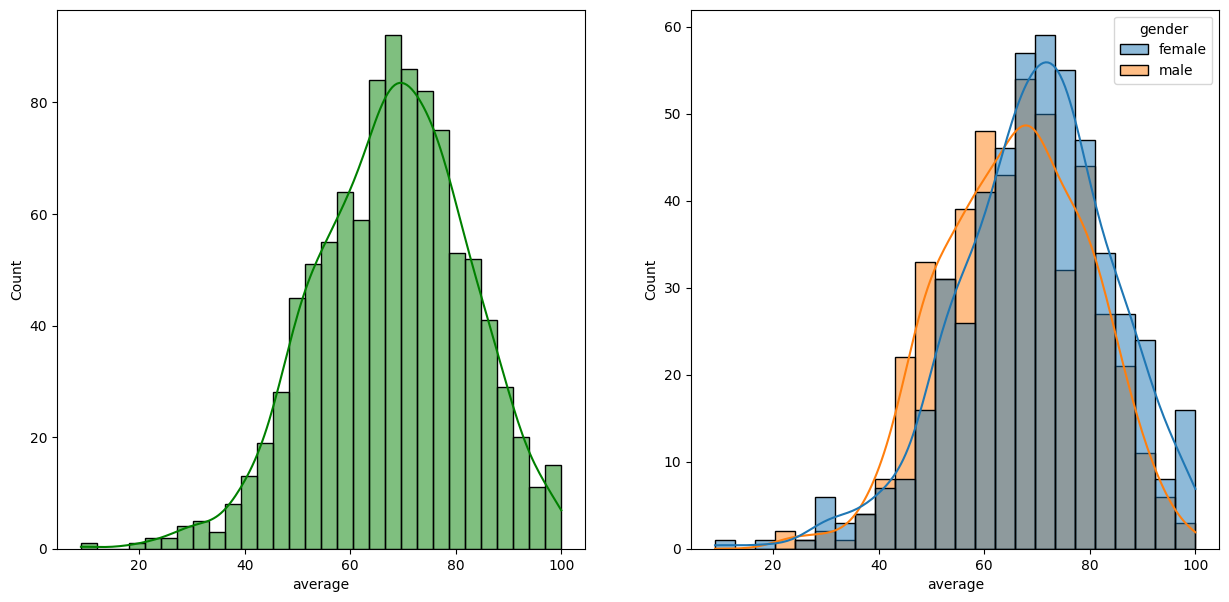

In [18]:
#visualization
fig, axs= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')

plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')

plt.show()

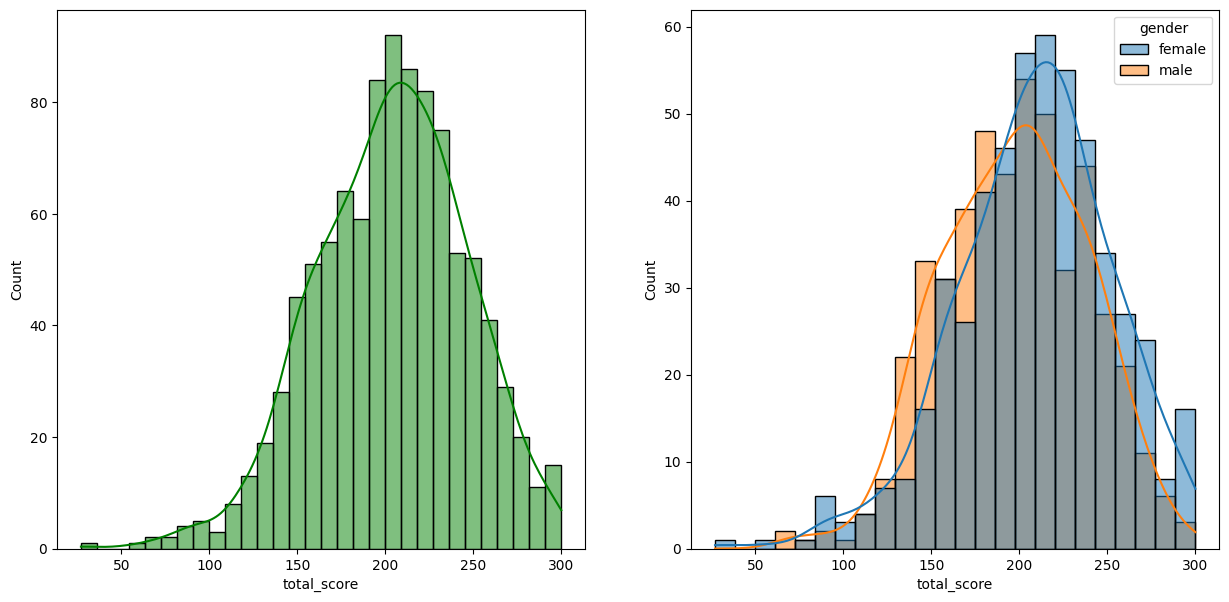

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

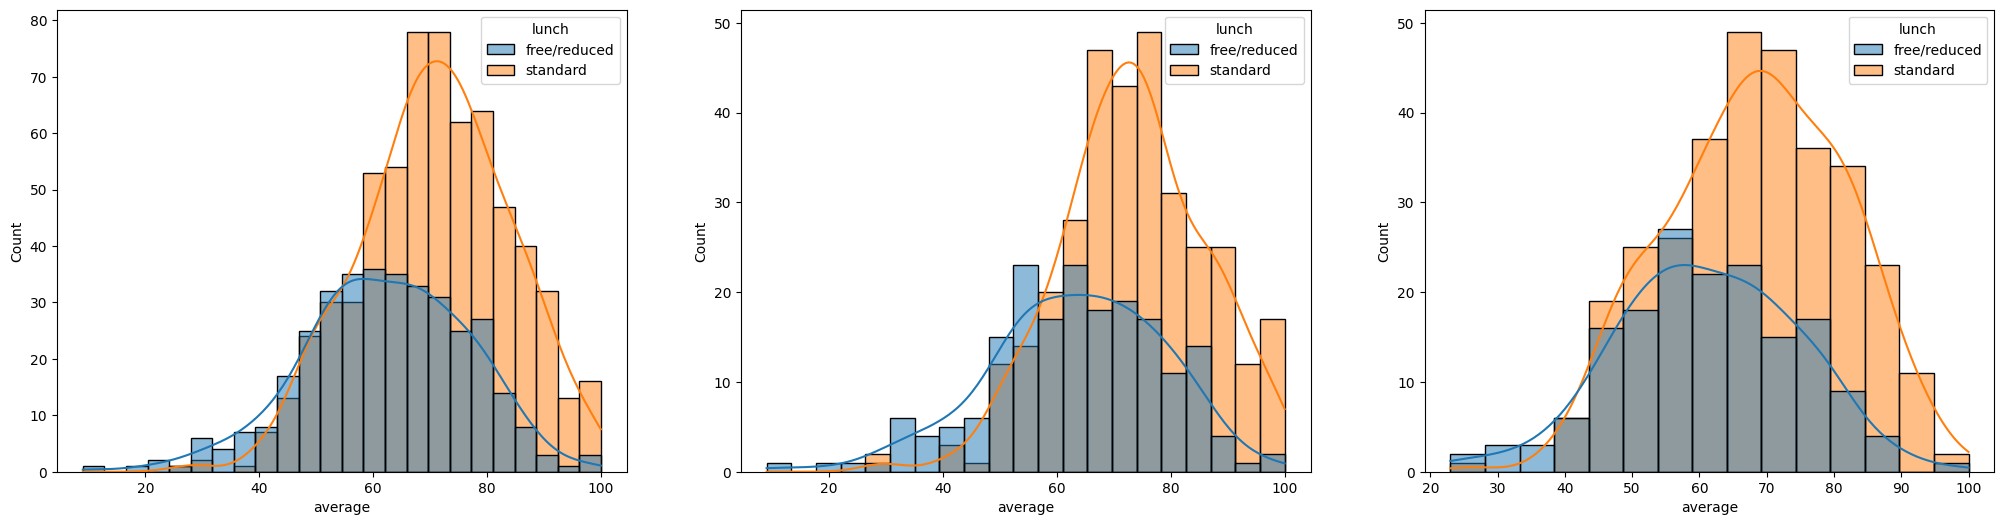

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

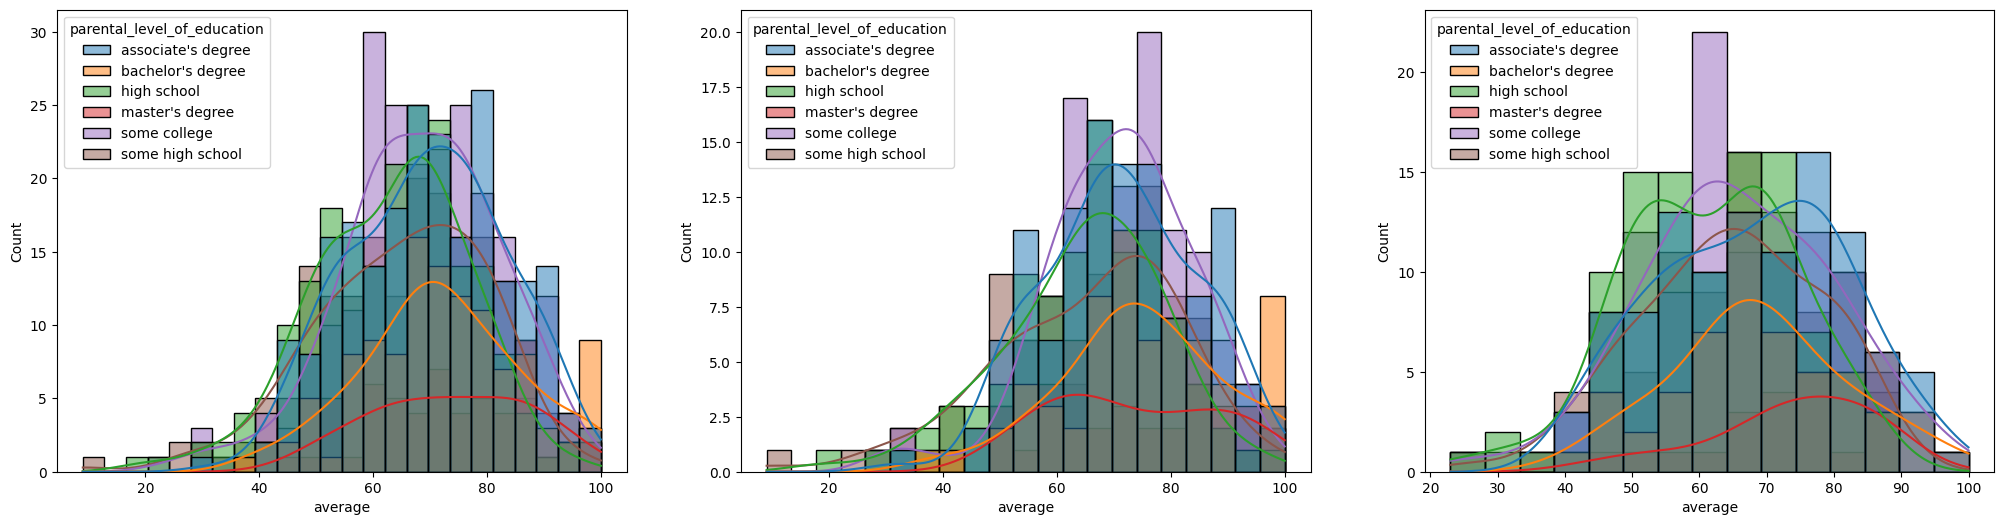

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

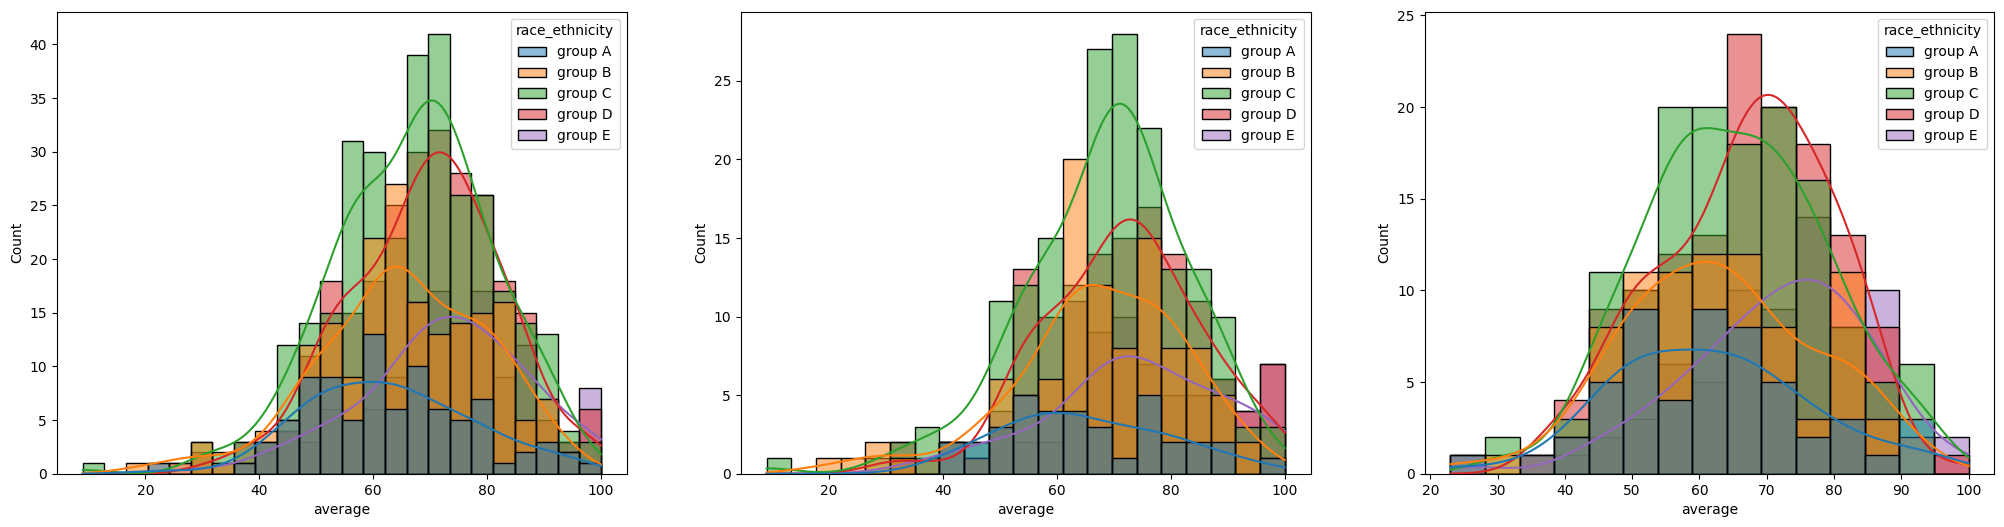

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

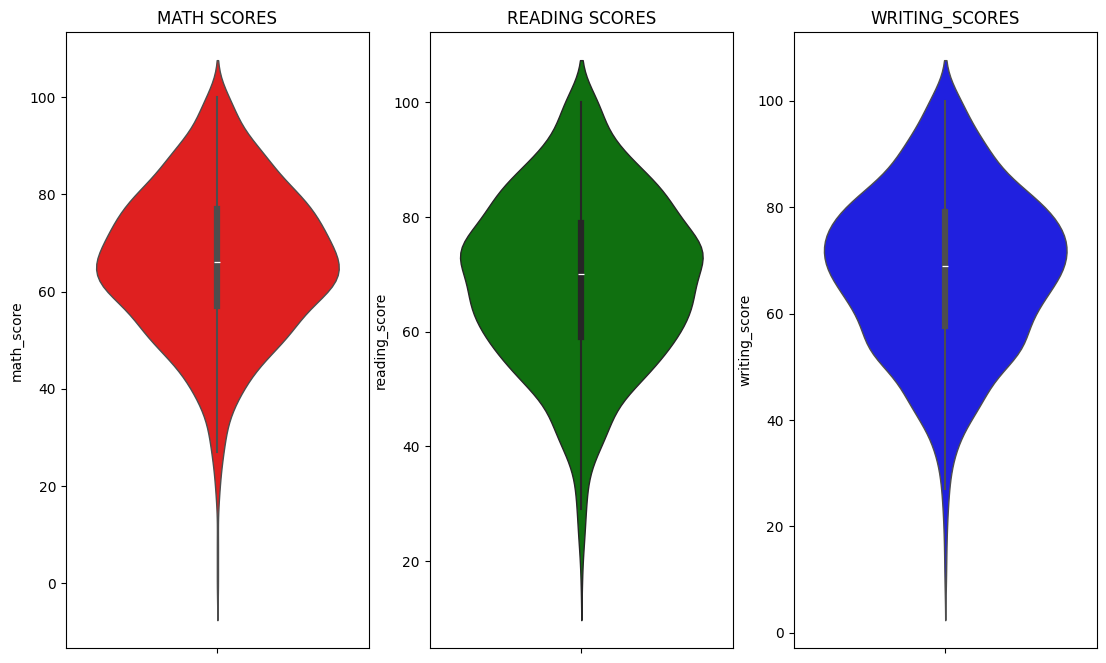

In [23]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=1)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=1)
plt.subplot(1, 4, 3)
plt.title('WRITING_SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=1)
plt.show()

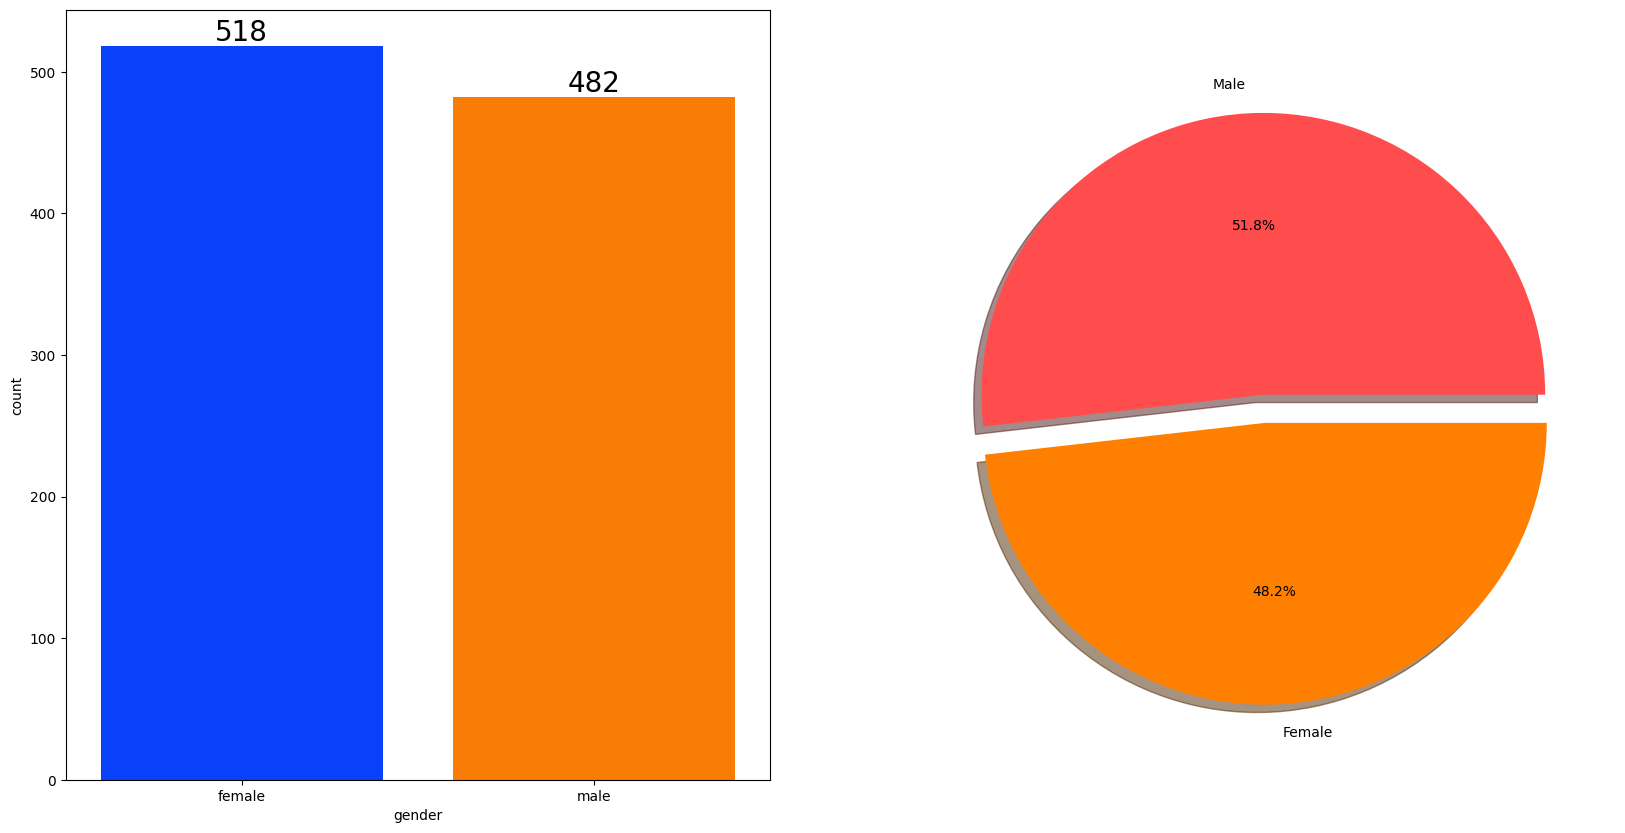

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
  ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [29]:
#BIVARITE analysis

gender_group=df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


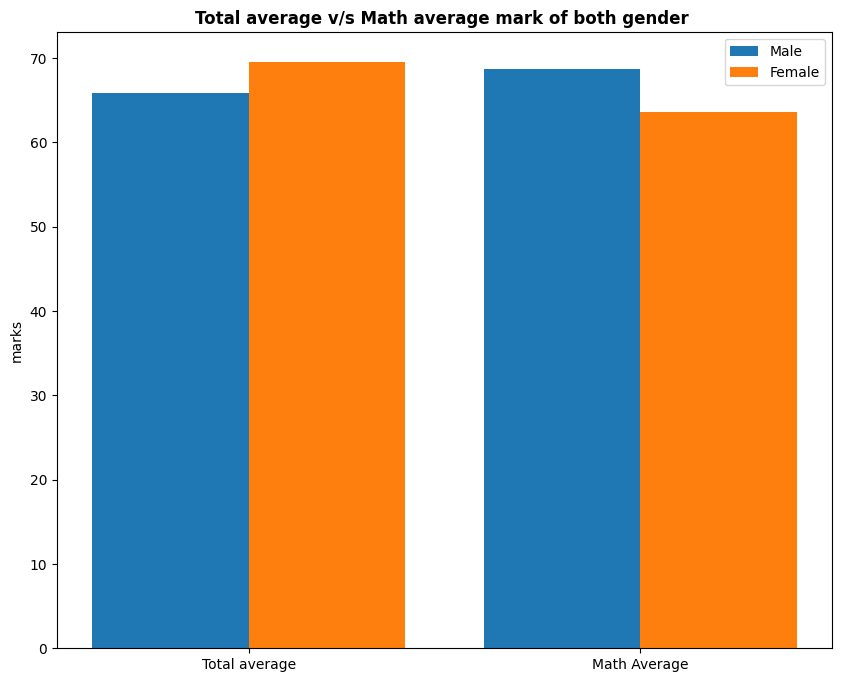

In [28]:
plt.figure(figsize=(10,8))
X=['Total average' ,'Math Average']

female_scores=[gender_group['average'][0],gender_group['math_score'][0]]
male_scores=[gender_group['average'][1],gender_group['math_score'][1]]


X_axis=np.arange(len(X))

plt.bar(X_axis-0.2,male_scores,0.4,label='Male')
plt.bar(X_axis+0.2,female_scores,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel("marks")
plt.title("Total average v/s Math average mark of both gender ",fontweight='bold')
plt.legend()
plt.show()

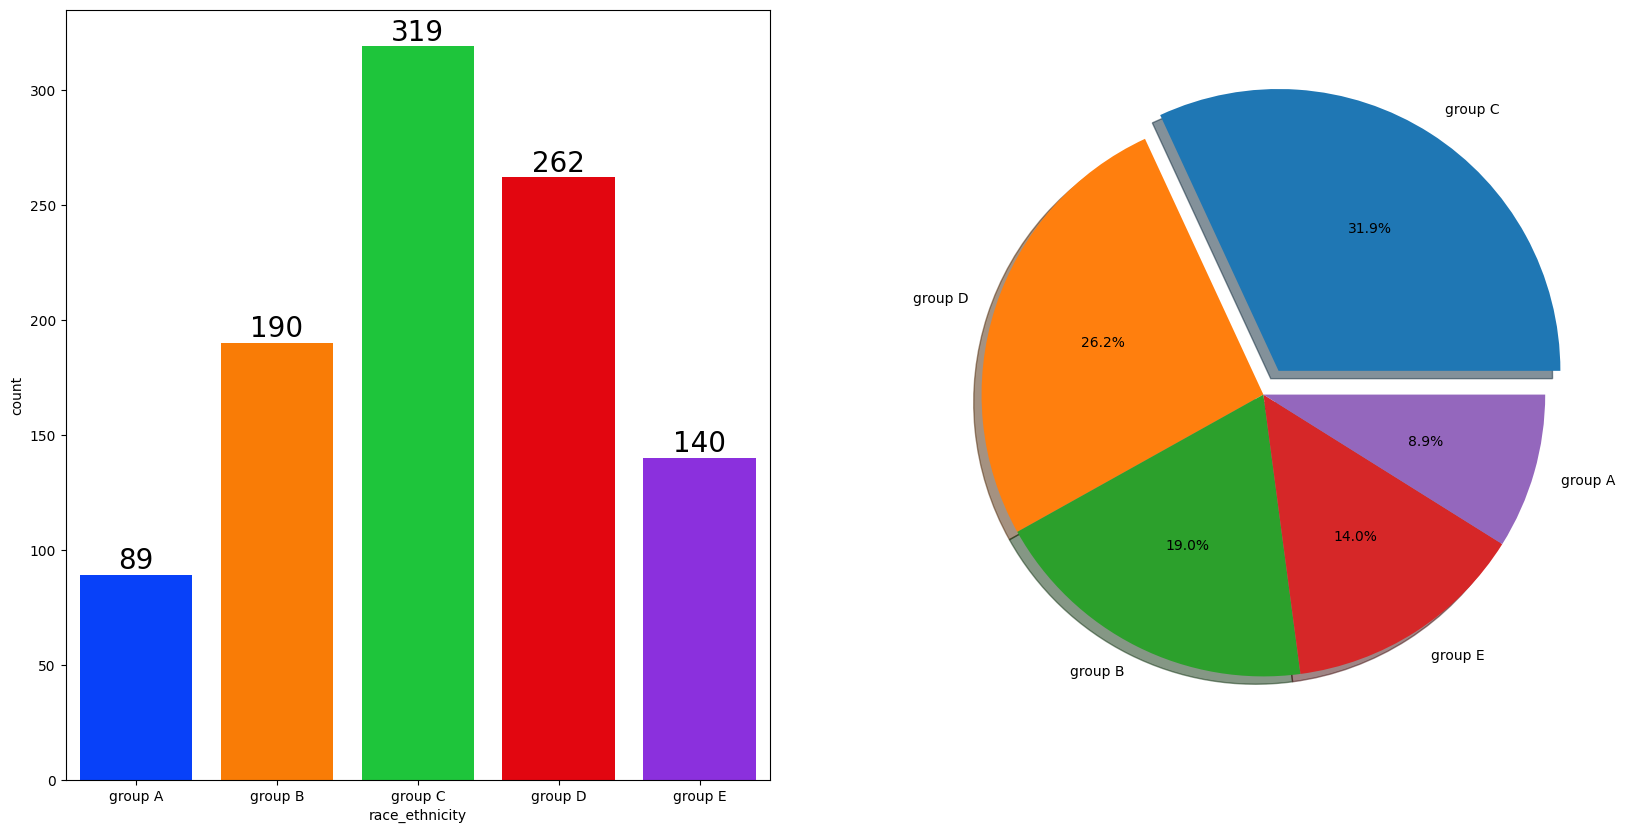

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
  ax[0].bar_label(container,color='black',size=20)

plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

In [35]:
group_data=df.groupby('race_ethnicity')
group_data['math_score'].mean().values

array([61.62921348, 63.45263158, 64.46394984, 67.36259542, 73.82142857])

Text(0.5, 1.0, 'Writing score')

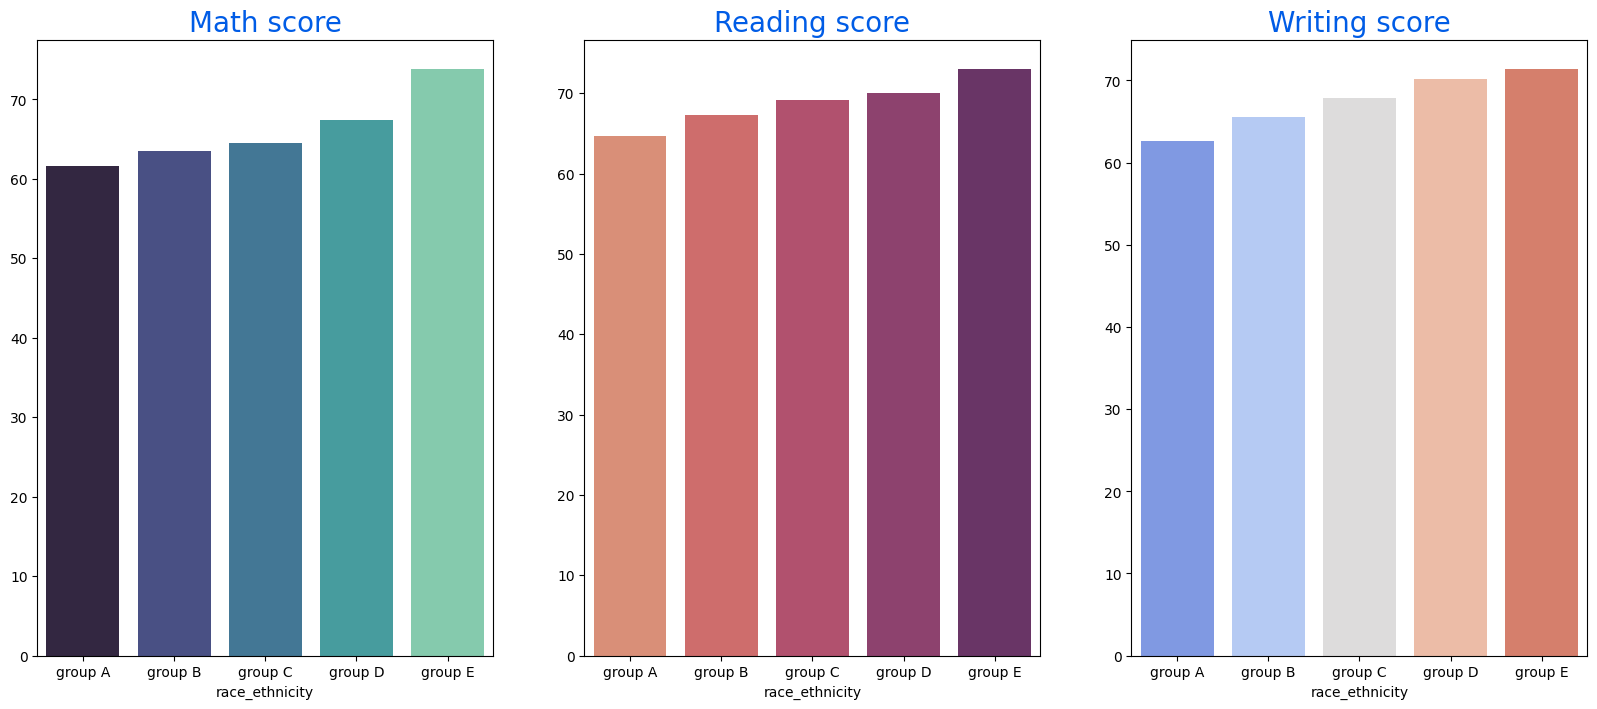

In [38]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

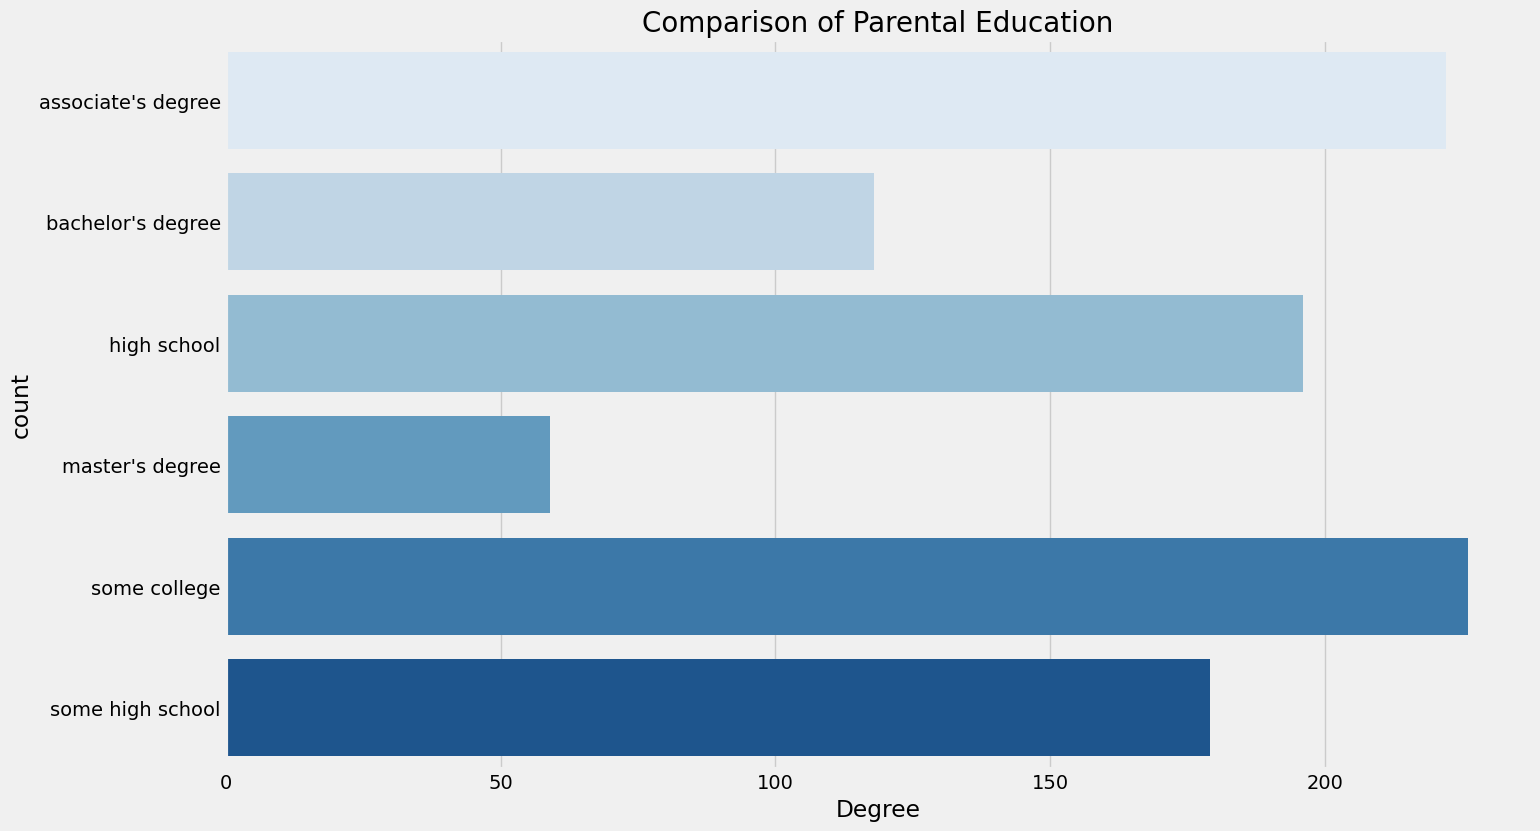

In [39]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

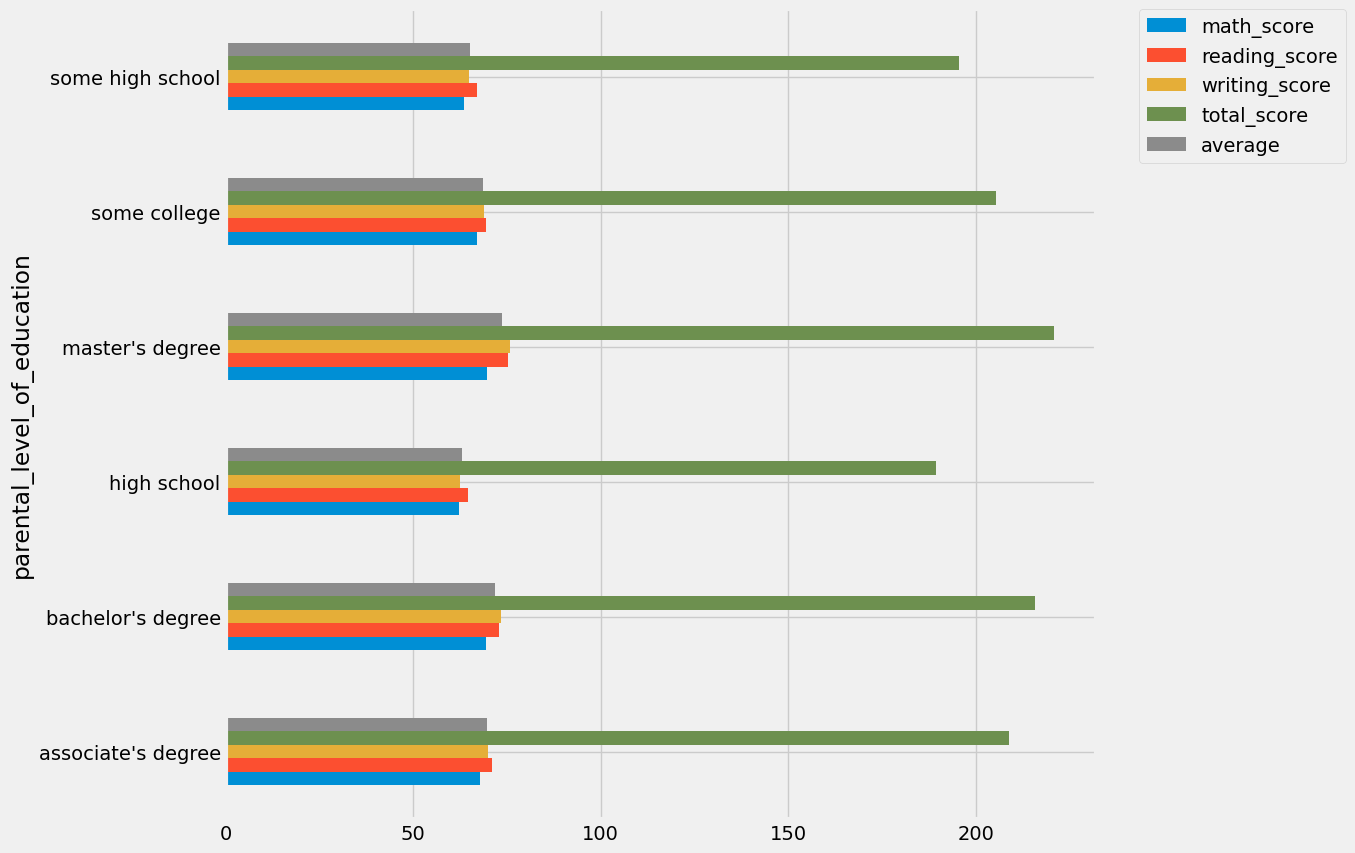

In [41]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

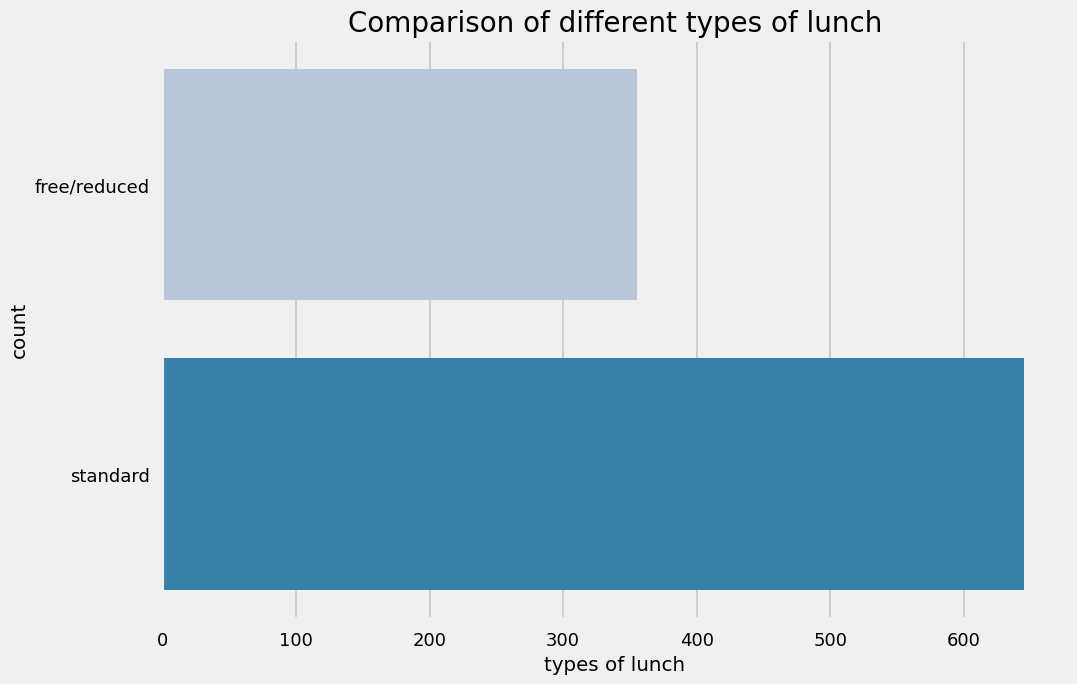

In [42]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

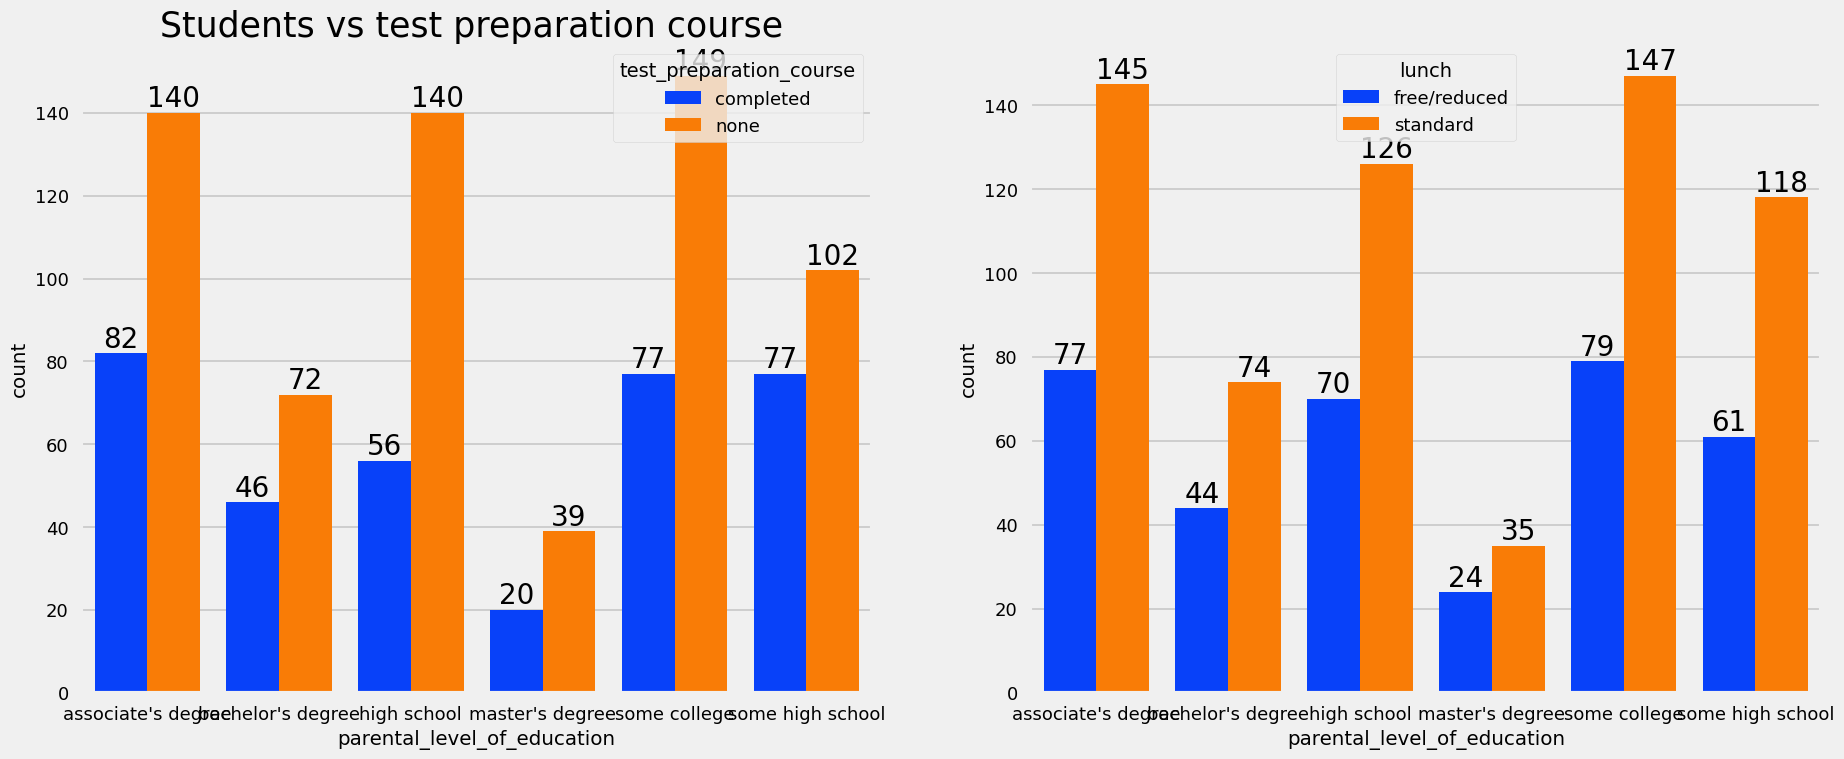

In [43]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

<Axes: xlabel='lunch', ylabel='writing_score'>

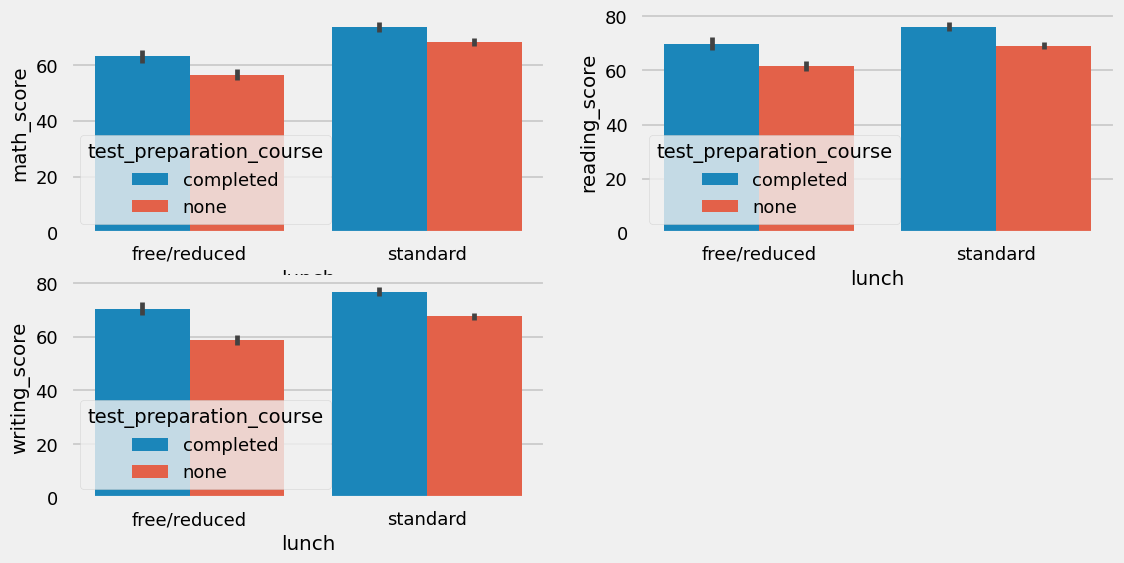

In [48]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

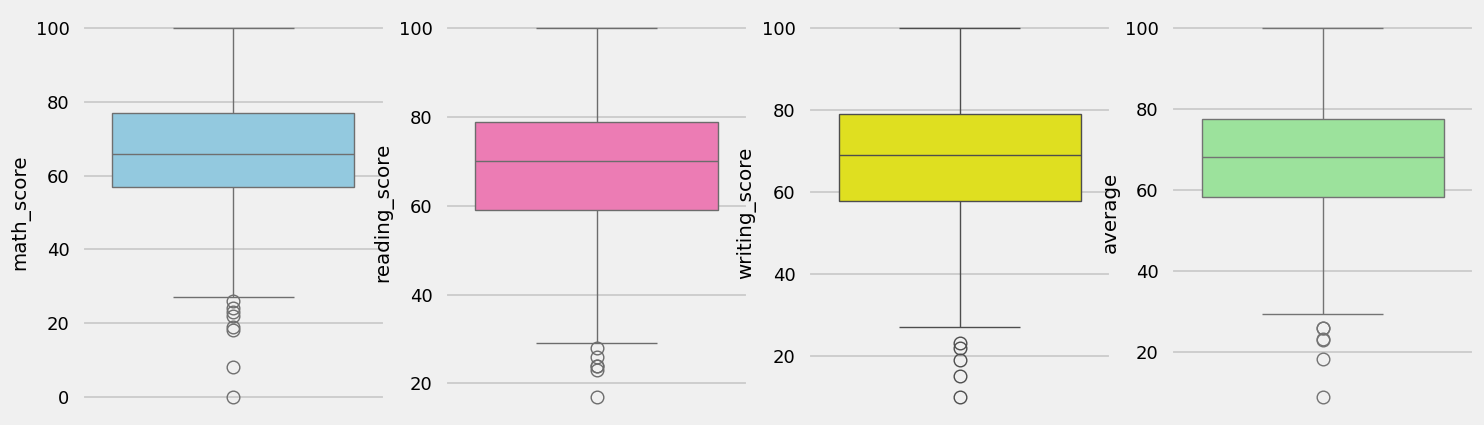

In [50]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()


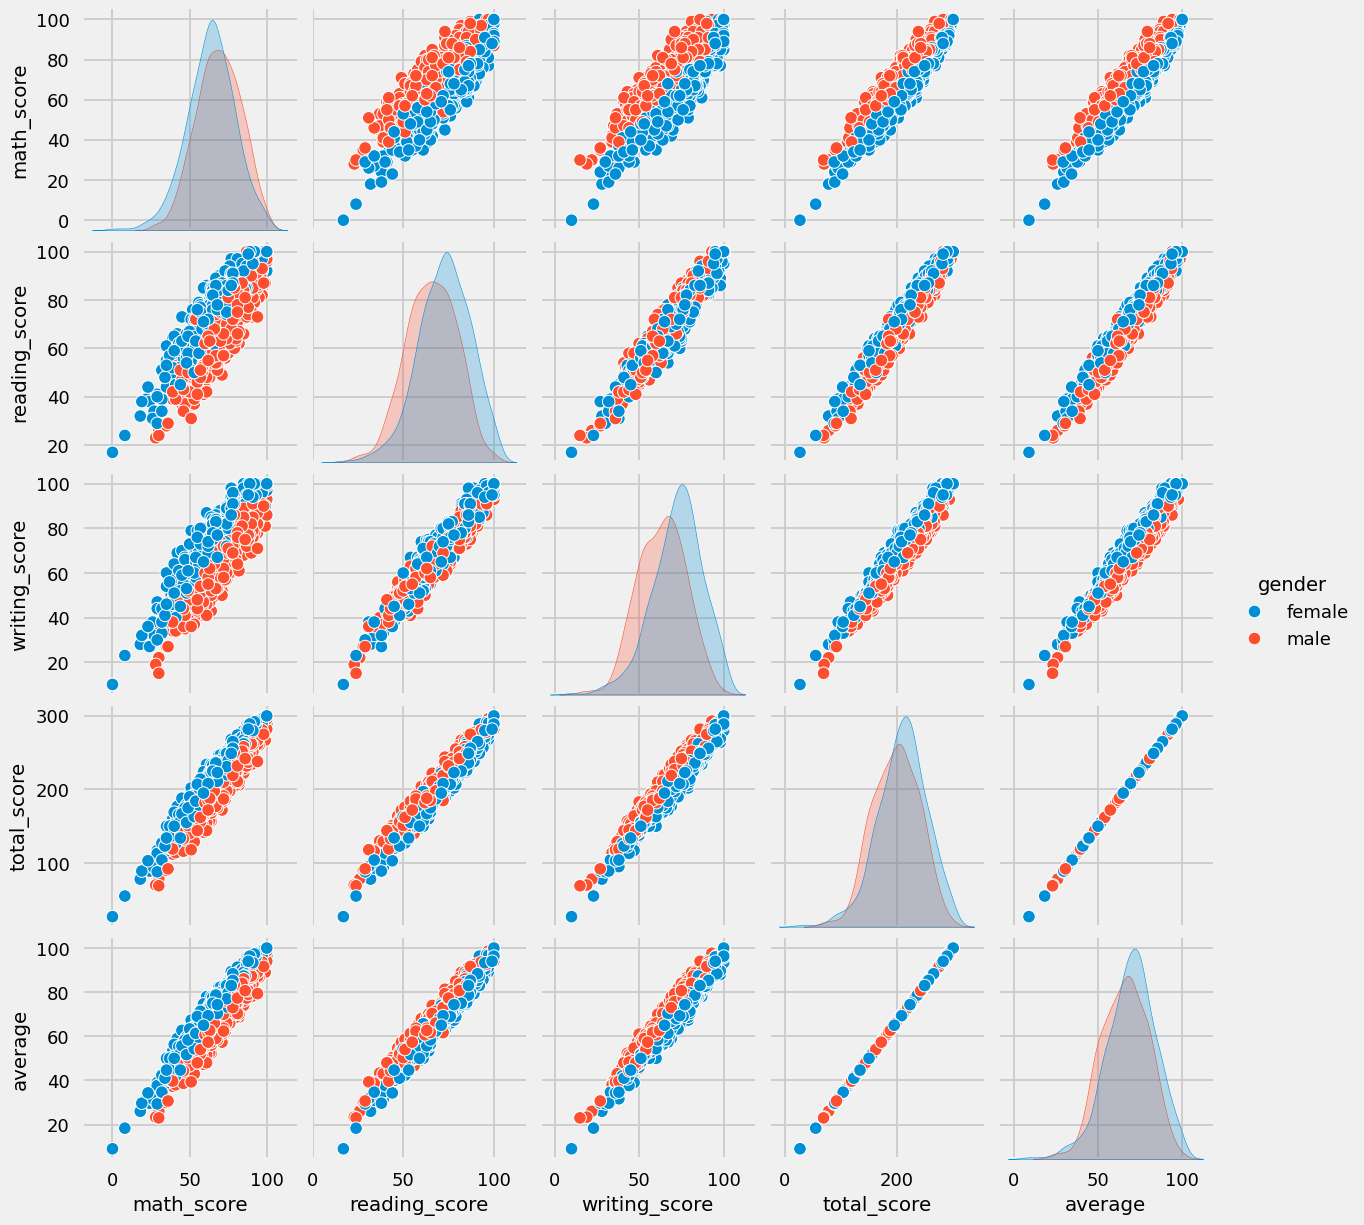

In [51]:
sns.pairplot(df,hue = 'gender')
plt.show()